# Laboratorio 4(Aplicacion de Regularizacion) Grupo 1
 <h3>En este laboratorio se hizo el uso del dataset para aplicar la regularización y sin utilizar regularización, y com siguiente se presento los resultados de ambas experiencias<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 26/03/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Lab%201)
  
  * [Enlace al Colab](https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Laboratorios/Laboratorio%201/Laboratorio1.ipynb?hl=es)
  
 <h3>

 Para el laboratorio implementando regularizacion se hizo uso del dataset para predecir el precio de las casas en USA. El enlace al dataset es [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

El conjunto de datos, denominado ``kc_house_data.csv``, contiene un conjunto de entrenamiento de precios de casas en el condado de King. Este conjunto de datos probablemente incluye varias características relevantes para predecir el precio de las casas, como el tamaño de la vivienda, el número de habitaciones, la ubicación, las características específicas de la casa, etc.


Primero se importo todas las librerias necesarias:

In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Carga de datos del dataset

cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [2]:
#cargamos el dataset a un dataframe
df = pd.read_csv('kc_house_data.csv', delimiter=',')

#mostramos el dataset
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Analisis del dataset
Hacemos un analisis del dataset mostrando su informacion usando la funcion de `info()`:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
dataset = df.drop(['id', 'date'], axis=1).astype(float)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


Se puede notar que nuestro dataset cuenta con 21 columnas, donde nuestra colummna `price` sera nuestra Y_predicha, el cual se busca calcular el precio de una casa dada 20 caracteristicas.

## Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [89]:
#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = df.drop(['id', 'date'], axis=1).astype(float)

#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop(['price'], axis=1).values
y_test = test_dataset['price'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['price'], axis=1).values
y_train = train_dataset['price'].values
m_train = len(y_test)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}{:10.2f}{:10.0f}{:11.0f}{:14.0f}'.format(
        X_train[i, 0], 
        X_train[i, 1], 
        X_train[i, 2], 
        X_train[i, 3], 
        X_train[i, 4], 
        X_train[i, 5], 
        X_train[i, 6], 
        X_train[i, 7], 
        X_train[i, 8], 
        X_train[i, 9], 
        X_train[i, 10], 
        X_train[i, 11],
        X_train[i, 12],
        X_train[i, 13], 
        X_train[i, 14], 
        X_train[i, 15], 
        X_train[i, 16], 
        X_train[i, 17], 
        y_train[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]         Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       3       2      1780     13095       1       0       0       4       9      1780       0      1983         0     98042     47.37   -122.15      2750      13095        325000
       2       1      1000      3700       1       0       0       3       6       800     200      1929         0     98118     47.55   -122.29      1270       5000        257000
       3       1      1080      7486       2       0       0       3       6       990      90      1942         0     98146     47.48   -122.33      1170       7800        228500
       3       2      2090      7500       1       0       0       4       7      1280     810      197

In [90]:
#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(dataset)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 17290 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 4323 de ejemplos
La cantidad total de ejemplos es de: 21613 de ejemplos


## Funcion para la Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso

Hacemos el uso de la siguiente funcion para normalizar los datos:

In [91]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)
    
    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Funcion para graficar

In [173]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

## Creacion de la funcion del error cuadratico medio

In [177]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

## 1. Usando Regularizacion

La regularización es una técnica utilizada en el aprendizaje automático para prevenir el **sobreajuste (overfitting)** de un modelo a los datos de entrenamiento.

El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y captura el ruido o las fluctuaciones aleatorias en los datos en lugar de aprender la verdadera relación subyacente entre las características y la variable objetivo. Esto puede resultar en un rendimiento deficiente del modelo cuando se enfrenta a nuevos datos que no formaban parte del conjunto de entrenamiento.

### 1.1 regresion lineal multivariable

Carga de los datos para la regresion lineal multivariable:

In [92]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

#### 1.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

In [93]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0], 
        X_norm_RLM[i, 1], 
        X_norm_RLM[i, 2], 
        X_norm_RLM[i, 3], 
        X_norm_RLM[i, 4], 
        X_norm_RLM[i, 5], 
        X_norm_RLM[i, 6], 
        X_norm_RLM[i, 7], 
        X_norm_RLM[i, 8], 
        X_norm_RLM[i, 9], 
        X_norm_RLM[i, 10], 
        X_norm_RLM[i, 11],
        X_norm_RLM[i, 12],
        X_norm_RLM[i, 13], 
        X_norm_RLM[i, 14], 
        X_norm_RLM[i, 15], 
        X_norm_RLM[i, 16], 
        X_norm_RLM[i, 17],))



    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    -0.395    -0.474    -0.324    -0.044    -0.920    -0.085    -0.306     0.909     1.150    -0.007    -0.656     0.404    -0.208    -0.675    -1.397     0.442     1.126     0.013
    -1.469    -1.453    -1.184    -0.286    -0.920    -0.085    -0.306    -0.625    -1.413    -1.200    -0.200    -1.431    -0.208     0.751    -0.060    -0.540    -1.047    -0.281
    -0.395    -1.453    -1.095    -0.188     0.002    -0.085    -0.306    -0.625    -1.413    -0.969    -0.451    -0.989    -0.208     1.276    -0.553    -0.860    -1.193    -0.179
    -0.395     0.178     0.018    -0.188    -0.920    -0.085    -0.306     0.909    -0.559    -

#### 1.1.2 Agregamos la columna de unos a nuestra matriz

In [94]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0], 
        X_ready_RLM[i, 1], 
        X_ready_RLM[i, 2], 
        X_ready_RLM[i, 3], 
        X_ready_RLM[i, 4], 
        X_ready_RLM[i, 5], 
        X_ready_RLM[i, 6], 
        X_ready_RLM[i, 7], 
        X_ready_RLM[i, 8], 
        X_ready_RLM[i, 9], 
        X_ready_RLM[i, 10], 
        X_ready_RLM[i, 11],
        X_ready_RLM[i, 12],
        X_ready_RLM[i, 13], 
        X_ready_RLM[i, 14], 
        X_ready_RLM[i, 15], 
        X_ready_RLM[i, 16], 
        X_ready_RLM[i, 17],
        X_ready_RLM[i, 18]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]  X[:, 18]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -0.395    -0.474    -0.324    -0.044    -0.920    -0.085    -0.306     0.909     1.150    -0.007    -0.656     0.404    -0.208    -0.675    -1.397     0.442     1.126     0.013
     1.000    -1.469    -1.453    -1.184    -0.286    -0.920    -0.085    -0.306    -0.625    -1.413    -1.200    -0.200    -1.431    -0.208     0.751    -0.060    -0.540    -1.047    -0.281
     1.000    -0.395    -1.453    -1.095    -0.188     0.002    -0.085    -0.306    -0.625    -1.413    -0.969    -0.451    -0.989    -0.208     1.276    -0.553    -0.860    -1.193    -0.179
     1.000    -0.395     0.178     0.018    -0.188    -

#### 1.1.3 Descenso por el gradiente

El descenso por el gradiente con la función de costo es un algoritmo fundamental en el aprendizaje automático supervisado, especialmente en problemas de optimización de modelos. Su propósito principal es minimizar la función de costo (o pérdida) de un modelo mediante ajustes iterativos de los parámetros del modelo.

##### 1.1.3.1 Cálculo del costo $J(\theta)$

In [95]:
#aumentamos el parametro de lambda para aplicar regularizacion
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta, lambda_):
    m = y.size
    J = 0
    
    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta
    temp[0] = 0
    #h = np.dot(X, theta)
    # print(h)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [96]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5,0.8, 1.0, 0.2,0.3])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3,0.9, 2.0, 0.12,0.7])

lambda_ = 1000
print(theta.shape[0])
print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready_RLM, y_trainRLM, theta, lambda_)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready_RLM, y_trainRLM, theta1, lambda_)}")

19
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.5 0.8 1.  0.2
 0.3] se obtiene un costo de: 209918830024.66028
########################################################################################################
con theta:[0.1  2.   0.5  0.2  8.   0.7  1.3  8.   1.7  0.7  7.1  0.6  0.6  1.
 0.3  0.9  2.   0.12 0.7 ] se obtiene un costo de: 209917572125.19516


##### 1.1.3.2Descenso por el gradiente

Creamos la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, se hizo la modificacion para que la funcion ahora reciba el parametro de ``lamda_``

In [97]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha,lambda_, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # se hace uso de la funcion de costo para calcular el costo en cada iteracion, sin olvidar del parametro lambda_
        J_historico.append(calcularCosto(X, y, theta, lambda_))

    return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [128]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 3100
alpha = 0.0009
lambda_ = 0.9

theta, J_historico = calcularDescensoGradiente(X_ready_RLM, y_trainRLM, theta , alpha,lambda_, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

print("la cantidad de theta son: ", theta.shape[0])

########################################################################################################
Los valores de theta calculados son:
theta 1: 0.0
theta 2: -18119.190355883362
theta 3: 30169.282961904843
theta 4: 71312.7359672852
theta 5: 2818.407451509464
theta 6: 7470.034713846131
theta 7: 45469.80320896676
theta 8: 43857.62535876008
theta 9: 21926.776567148994
theta 10: 87742.30180595949
theta 11: 64111.51415420493
theta 12: 27411.56026509586
theta 13: -56095.43951797542
theta 14: 15423.087765593058
theta 15: -13138.933322533972
theta 16: 79851.69917873734
theta 17: -25331.818194579253
theta 18: 41333.05167819735
theta 19: -5619.4969404384365
########################################################################################################
con un costo de: 164642045117.09067 
la cantidad de theta son:  19


##### 1.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

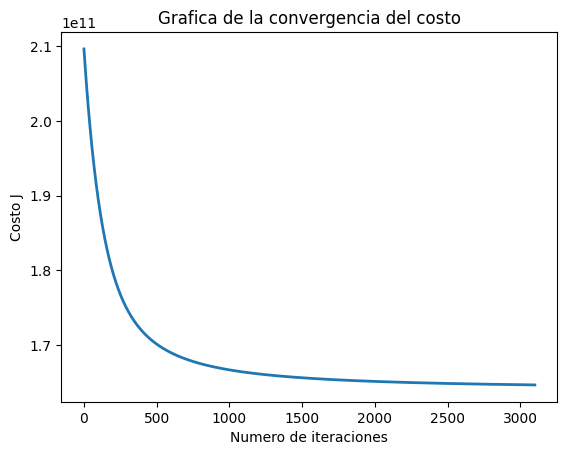

In [130]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

##### 1.1.4.1 Grafica de la regresion lineal

En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

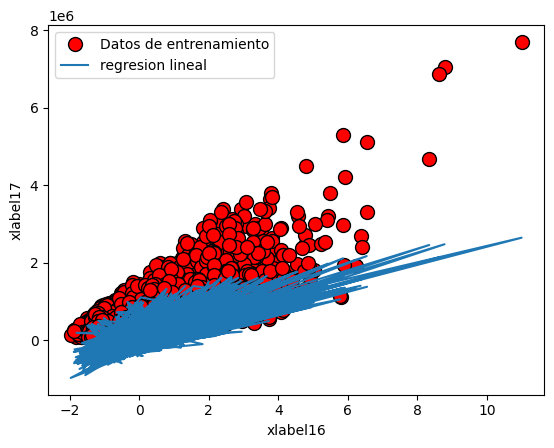

In [131]:
graficarDatos(X_ready_RLM[:, 3], y_trainRLM , "xlabel16", "xlabel17")

pyplot.plot(X_ready_RLM[:,3], np.dot(X_ready_RLM, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una pequeña prueba:

In [132]:
X_array = np.array([1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])
X_array = X_array.reshape(1, -1)

X_array[:, 1:] = (X_array[:, 1:] - mu_RLM) / sigma_RLM

prediccion = np.dot(X_array, theta)

print (f"La prediccion de la casa es de: {prediccion}")

La prediccion de la casa es de: [-315083.14475965]


##### 1.1.6 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [172]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre.append(np.dot(datos, theta))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

20
19
+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+------------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |      Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+============+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.51

### 1.1.7 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

haciendo calculo del error cuadratico medio:

In [179]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_RLM in X_testRLM_ready:
    y_predicha.append(np.dot(data_RLM, theta))

mse = mean_squared_error(y_predicha, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 339104534734.9084
Raíz del Error Cuadrático Medio (RMSE) = 582326.8281085016


### 2. Regresion Polinomica

Importamos **PolynomialFeatures** es una clase en scikit-learn que se utiliza para generar características polinómicas a partir de un conjunto de características existente. En el contexto de regresión polinómica, puedes usar PolynomialFeatures para generar nuevas características que son combinaciones polinómicas de las características originales.

In [181]:
from sklearn.preprocessing import PolynomialFeatures

Carga de los datos para la regresion lineal multivariable:

In [186]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLP = X_test.copy()
y_testRLP = y_test.copy()
m_test_RLP = len(y_testRLM)

#estos datos seran usados para el test

#hacemos uso de la libreria PolynomialFeatures para hacer la regresion polinomial de grado 2
poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
X_trainRLP = poly.fit_transform(X_train.copy())
y_trainRLP = y_train.copy()
m_train_RLP = len(y_trainRLM)

print("la cantidad de columnas de X_trainRLP es de: ", X_trainRLP.shape[1])
print("la cantidad de ejemplos de X_trainRLP es de: ", X_trainRLP.shape[0])

la cantidad de columnas de X_trainRLP es de:  190
